In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [94]:
df = pd.read_csv('../Dataset/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [95]:
# Convert USD to INR (1 USD = 83 INR approximately)
USD_TO_INR = 83

print(f"Currency Conversion Rate: 1 USD = ₹{USD_TO_INR}")
print("All prices will be displayed in Indian Rupees (INR)")

Currency Conversion Rate: 1 USD = ₹83
All prices will be displayed in Indian Rupees (INR)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [97]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [98]:
df.shape

(4009, 12)

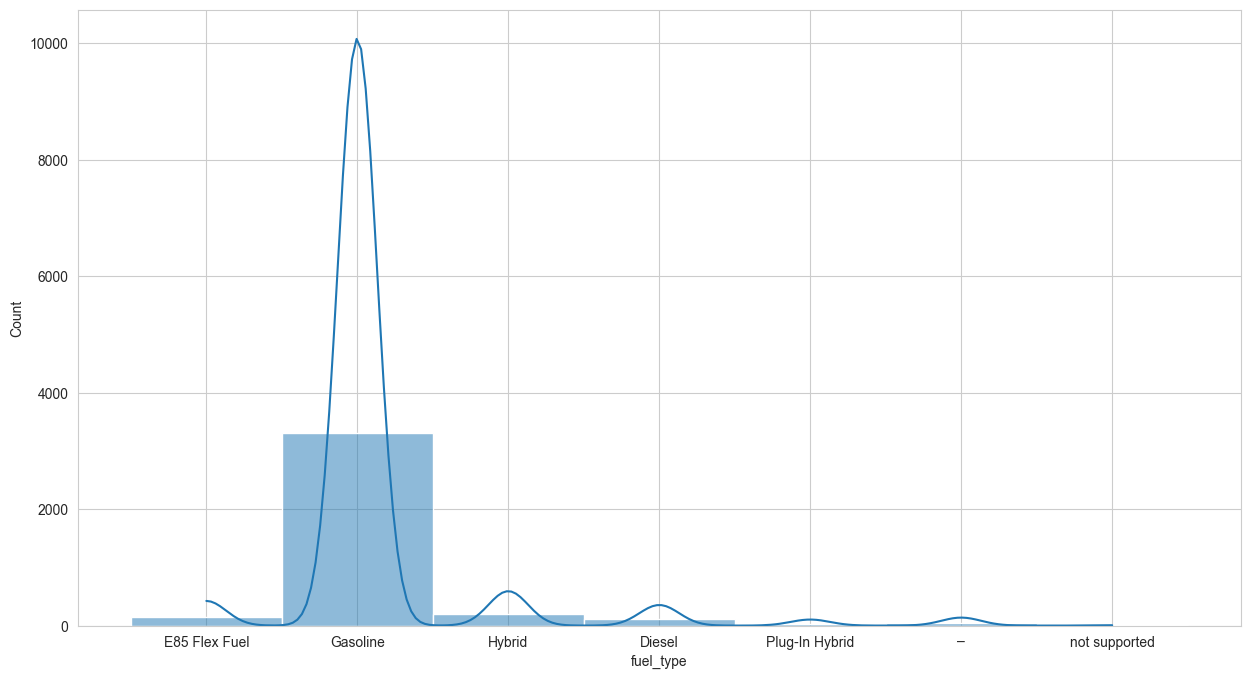

In [99]:
plt.figure(figsize=(15, 8))
sns.histplot(x='fuel_type', data=df, kde=True)
plt.show()


In [100]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [101]:
mode_fuel = df['fuel_type'].mode().iloc[0]
df['fuel_type_filled'] = df['fuel_type'].fillna(mode_fuel)

In [102]:
df[['fuel_type', 'fuel_type_filled']]

,fuel_type,fuel_type_filled
0,E85 Flex Fuel,E85 Flex Fuel
1,Gasoline,Gasoline
2,Gasoline,Gasoline
3,Hybrid,Hybrid
4,Gasoline,Gasoline
...,...,...
4004,Gasoline,Gasoline
4005,Gasoline,Gasoline
4006,NaN,Gasoline
4007,Gasoline,Gasoline


In [103]:
mode_fuel = df['accident'].mode().iloc[0]
df['accident_filled'] = df['accident'].fillna(mode_fuel)

In [104]:
df[['accident', 'accident_filled']]

,accident,accident_filled
0,At least 1 accident or damage reported,At least 1 accident or damage reported
1,At least 1 accident or damage reported,At least 1 accident or damage reported
2,None reported,None reported
3,None reported,None reported
4,None reported,None reported
...,...,...
4004,None reported,None reported
4005,None reported,None reported
4006,None reported,None reported
4007,None reported,None reported


In [105]:
df['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [106]:
mode_fuel = df['clean_title'].mode().iloc[0]
df['clean_title_filled'] = df['clean_title'].fillna(mode_fuel)

In [107]:
df[['clean_title', 'clean_title_filled']]

,clean_title,clean_title_filled
0,Yes,Yes
1,Yes,Yes
2,NaN,Yes
3,Yes,Yes
4,NaN,Yes
...,...,...
4004,Yes,Yes
4005,Yes,Yes
4006,NaN,Yes
4007,Yes,Yes


In [108]:
df.isnull().sum()

brand                   0
model                   0
model_year              0
milage                  0
fuel_type             170
engine                  0
transmission            0
ext_col                 0
int_col                 0
accident              113
clean_title           596
price                   0
fuel_type_filled        0
accident_filled         0
clean_title_filled      0
dtype: int64

In [109]:
# Statistical Summary
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [110]:
# Create a copy of the dataframe
df_clean = df.copy()

# Clean price column - remove $ and commas, convert to float
df_clean['price_clean'] = df_clean['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Clean milage column - remove 'mi.' and commas, convert to float
df_clean['milage_clean'] = df_clean['milage'].str.replace(' mi.', '').str.replace(',', '').astype(float)

# Extract numeric horsepower from engine column
df_clean['horsepower'] = df_clean['engine'].str.extract('(\d+\.?\d*)HP').astype(float)

# Extract engine displacement
df_clean['engine_size'] = df_clean['engine'].str.extract('(\d+\.?\d*)L').astype(float)

print("Data cleaning completed!")
print(f"Price range: ${df_clean['price_clean'].min():.0f} - ${df_clean['price_clean'].max():.0f}")
print(f"Mileage range: {df_clean['milage_clean'].min():.0f} - {df_clean['milage_clean'].max():.0f} miles")

Data cleaning completed!
Price range: $2000 - $2954083
Mileage range: 100 - 405000 miles


In [111]:
# Fill missing values
df_clean['fuel_type'] = df_clean['fuel_type'].fillna(df_clean['fuel_type'].mode()[0])
df_clean['accident'] = df_clean['accident'].fillna('None reported')
df_clean['clean_title'] = df_clean['clean_title'].fillna('Yes')
df_clean['ext_col'] = df_clean['ext_col'].fillna('Unknown')
df_clean['int_col'] = df_clean['int_col'].fillna('Unknown')

# Check remaining missing values
print("Remaining missing values after filling:")
print(df_clean.isnull().sum())

Remaining missing values after filling:
brand                   0
model                   0
model_year              0
milage                  0
fuel_type               0
engine                  0
transmission            0
ext_col                 0
int_col                 0
accident                0
clean_title             0
price                   0
fuel_type_filled        0
accident_filled         0
clean_title_filled      0
price_clean             0
milage_clean            0
horsepower            808
engine_size           377
dtype: int64


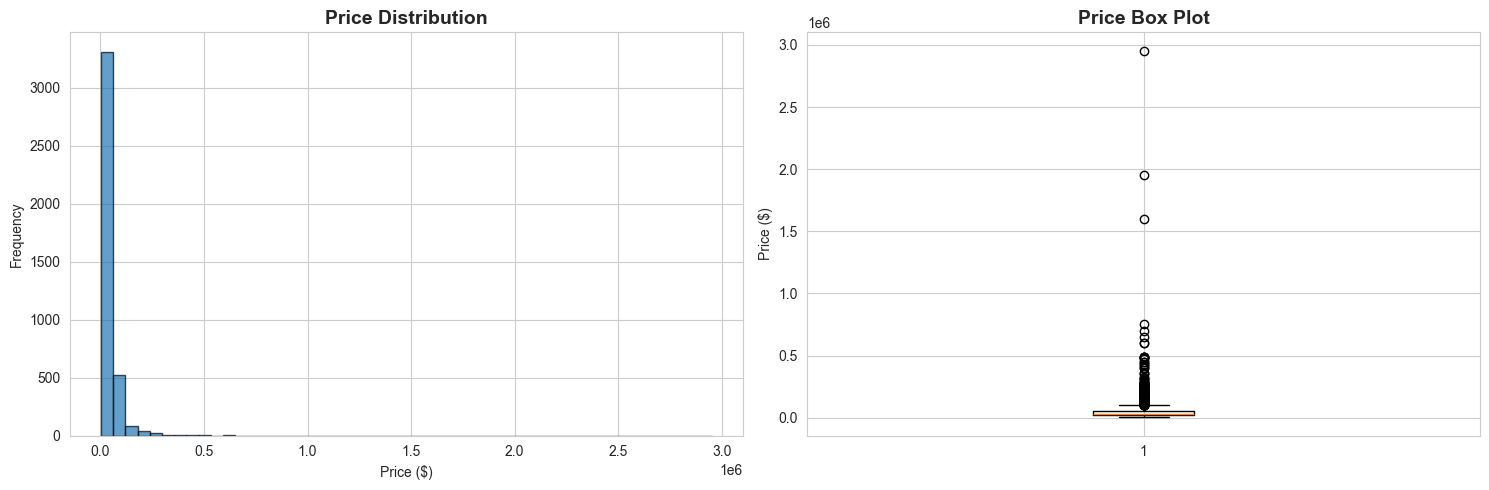

Mean Price: $44553.19
Median Price: $31000.00


In [112]:
# Price Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_clean['price_clean'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df_clean['price_clean'])
axes[1].set_title('Price Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

print(f"Mean Price: ${df_clean['price_clean'].mean():.2f}")
print(f"Median Price: ${df_clean['price_clean'].median():.2f}")

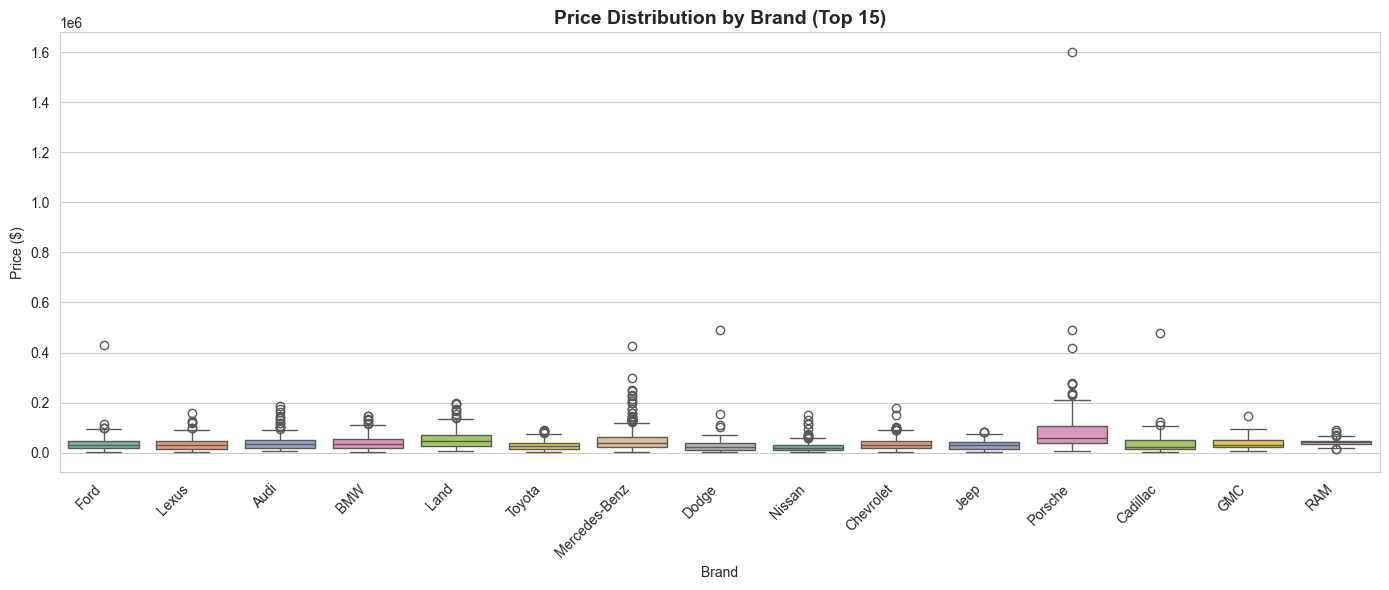

In [113]:
# Price by Brand (Top 15)
plt.figure(figsize=(14, 6))
top_brands = df_clean['brand'].value_counts().head(15).index
df_top_brands = df_clean[df_clean['brand'].isin(top_brands)]

sns.boxplot(data=df_top_brands, x='brand', y='price_clean', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Brand (Top 15)', fontsize=14, fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

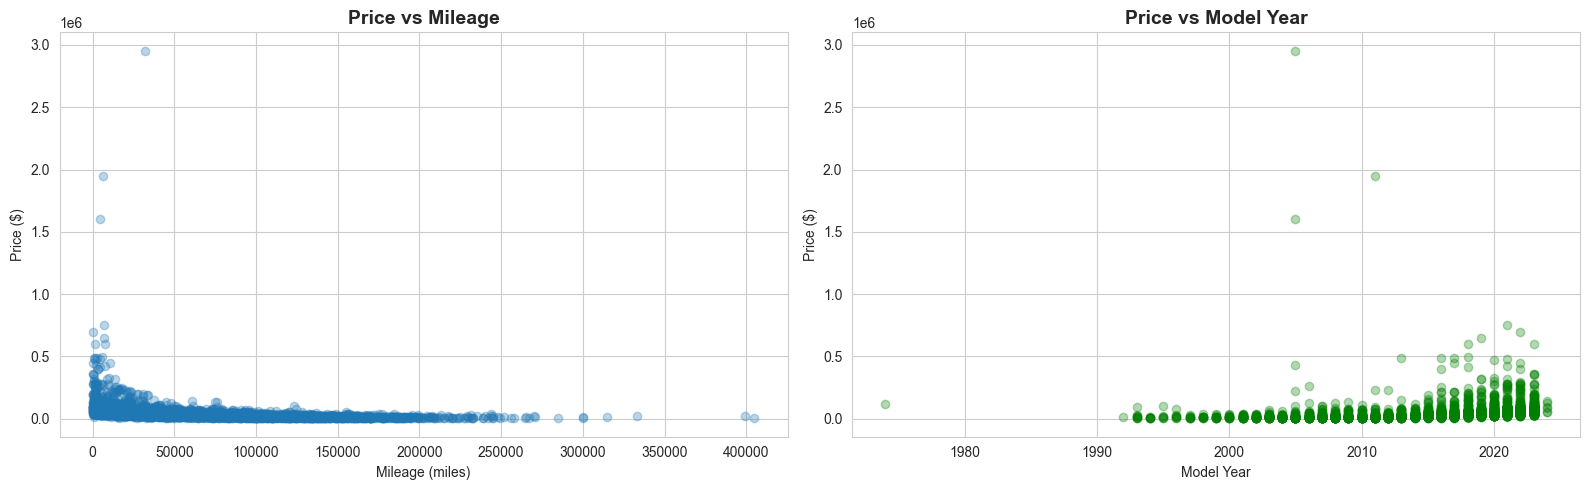

In [114]:
# Correlation Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Price vs Mileage
axes[0].scatter(df_clean['milage_clean'], df_clean['price_clean'], alpha=0.3)
axes[0].set_title('Price vs Mileage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mileage (miles)')
axes[0].set_ylabel('Price ($)')

# Price vs Model Year
axes[1].scatter(df_clean['model_year'], df_clean['price_clean'], alpha=0.3, color='green')
axes[1].set_title('Price vs Model Year', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Model Year')
axes[1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

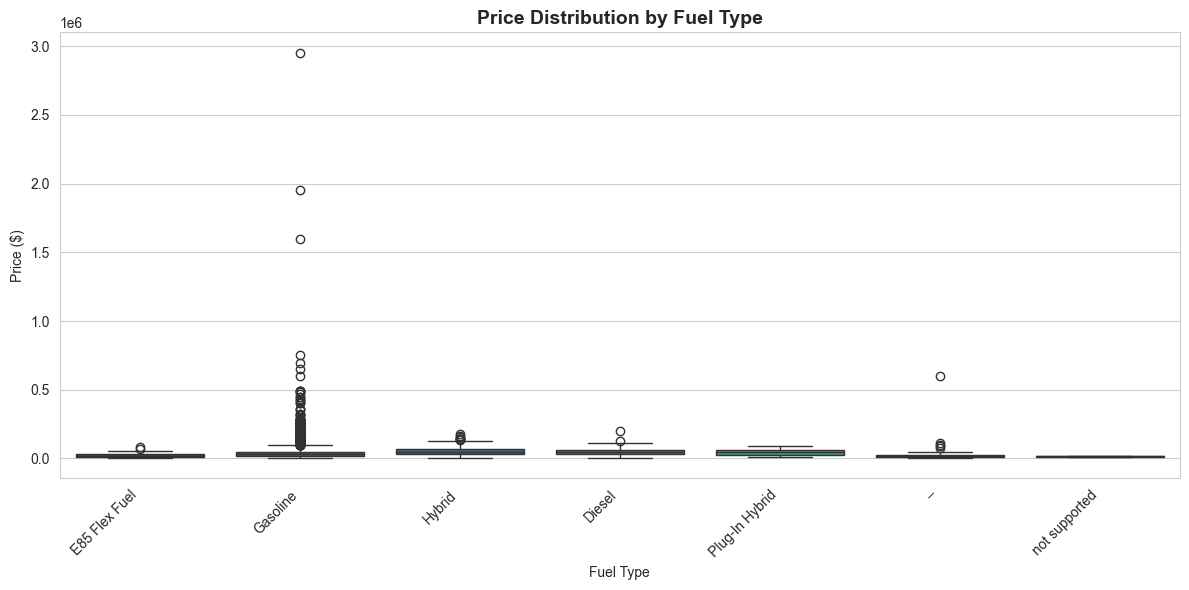

In [115]:
# Price by Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='fuel_type', y='price_clean', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Fuel Type', fontsize=14, fontweight='bold')
plt.xlabel('Fuel Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

In [116]:
# Create additional features
df_model = df_clean.copy()

# Car age (assuming current year is 2025)
df_model['car_age'] = 2025 - df_model['model_year']

# Create accident binary feature
df_model['has_accident'] = df_model['accident'].apply(lambda x: 0 if x == 'None reported' else 1)

# Create clean title binary feature
df_model['is_clean_title'] = df_model['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select features for modeling
features_to_use = ['brand', 'model_year', 'milage_clean', 'fuel_type', 'transmission', 
                   'car_age', 'has_accident', 'is_clean_title', 'horsepower', 'engine_size']

# Drop rows with missing values in important columns
df_model = df_model.dropna(subset=['price_clean', 'milage_clean', 'model_year'])

print(f"Dataset shape after cleaning: {df_model.shape}")
print(f"\nFeatures to use: {features_to_use}")

Dataset shape after cleaning: (4009, 22)

Features to use: ['brand', 'model_year', 'milage_clean', 'fuel_type', 'transmission', 'car_age', 'has_accident', 'is_clean_title', 'horsepower', 'engine_size']


In [117]:
# Encode categorical variables
df_encoded = df_model.copy()

# Label encode brand and transmission
le_brand = LabelEncoder()
le_fuel = LabelEncoder()
le_trans = LabelEncoder()

df_encoded['brand_encoded'] = le_brand.fit_transform(df_encoded['brand'])
df_encoded['fuel_type_encoded'] = le_fuel.fit_transform(df_encoded['fuel_type'])
df_encoded['transmission_encoded'] = le_trans.fit_transform(df_encoded['transmission'])

# Fill missing horsepower and engine_size with median
df_encoded['horsepower'] = df_encoded['horsepower'].fillna(df_encoded['horsepower'].median())
df_encoded['engine_size'] = df_encoded['engine_size'].fillna(df_encoded['engine_size'].median())

print("Encoding completed!")
print(f"Final dataset shape: {df_encoded.shape}")

Encoding completed!
Final dataset shape: (4009, 25)


In [118]:
# Prepare features and target
X = df_encoded[['brand_encoded', 'model_year', 'milage_clean', 'fuel_type_encoded', 
                'transmission_encoded', 'car_age', 'has_accident', 'is_clean_title',
                'horsepower', 'engine_size']]

y = df_encoded['price_clean']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature names:\n{list(X.columns)}")

Features shape: (4009, 10)
Target shape: (4009,)

Feature names:
['brand_encoded', 'model_year', 'milage_clean', 'fuel_type_encoded', 'transmission_encoded', 'car_age', 'has_accident', 'is_clean_title', 'horsepower', 'engine_size']


In [119]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData scaling completed!")

Training set size: 3207
Test set size: 802

Data scaling completed!


In [120]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, max_depth=5, learning_rate=0.1)
}

print("Models initialized:")
for name in models.keys():
    print(f"  - {name}")

Models initialized:
  - Linear Regression
  - Ridge Regression
  - Lasso Regression
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - XGBoost


In [121]:
# Train and evaluate models
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    })
    
    print(f"  MAE: ${mae:,.2f}")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  R² Score: {r2:.4f}")

print("\n" + "="*50)
print("Training completed for all models!")


Training Linear Regression...
  MAE: $27,815.43
  RMSE: $138,980.26
  R² Score: 0.0550

Training Ridge Regression...
  MAE: $27,813.91
  RMSE: $138,981.21
  R² Score: 0.0550

Training Lasso Regression...
  MAE: $27,815.30
  RMSE: $138,980.48
  R² Score: 0.0550

Training Decision Tree...
  MAE: $21,984.82
  RMSE: $135,969.75
  R² Score: 0.0955

Training Random Forest...
  MAE: $19,121.34
  RMSE: $131,460.14
  R² Score: 0.1545

Training Gradient Boosting...
  MAE: $19,121.34
  RMSE: $131,460.14
  R² Score: 0.1545

Training Gradient Boosting...
  MAE: $18,002.04
  RMSE: $130,903.56
  R² Score: 0.1616

Training XGBoost...
  MAE: $18,420.05
  RMSE: $130,993.40
  R² Score: 0.1605

Training completed for all models!
  MAE: $18,002.04
  RMSE: $130,903.56
  R² Score: 0.1616

Training XGBoost...
  MAE: $18,420.05
  RMSE: $130,993.40
  R² Score: 0.1605

Training completed for all models!


In [122]:
# Create results dataframe and display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R2 Score', ascending=False)

print("\n📊 MODEL COMPARISON RESULTS")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['R2 Score']
print(f"\n🏆 Best Model: {best_model_name} with R² Score: {best_r2:.4f}")


📊 MODEL COMPARISON RESULTS
            Model          MAE          RMSE  R2 Score
Gradient Boosting 18002.041283 130903.556274  0.161639
          XGBoost 18420.047513 130993.399904  0.160488
    Random Forest 19121.341644 131460.135265  0.154495
    Decision Tree 21984.815076 135969.746553  0.095491
Linear Regression 27815.433910 138980.264116  0.054994
 Lasso Regression 27815.303011 138980.481627  0.054991
 Ridge Regression 27813.913533 138981.205069  0.054981

🏆 Best Model: Gradient Boosting with R² Score: 0.1616


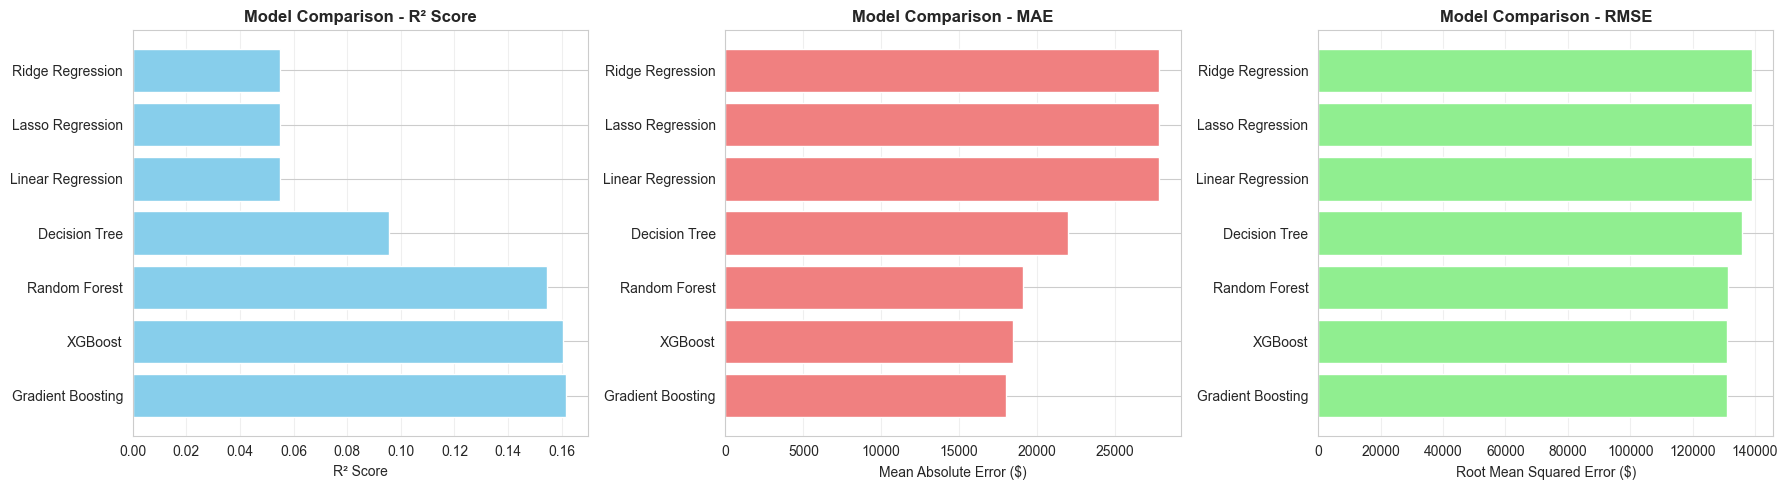

In [123]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R2 Score comparison
axes[0].barh(results_df['Model'], results_df['R2 Score'], color='skyblue')
axes[0].set_xlabel('R² Score')
axes[0].set_title('Model Comparison - R² Score', fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# MAE comparison
axes[1].barh(results_df['Model'], results_df['MAE'], color='lightcoral')
axes[1].set_xlabel('Mean Absolute Error ($)')
axes[1].set_title('Model Comparison - MAE', fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# RMSE comparison
axes[2].barh(results_df['Model'], results_df['RMSE'], color='lightgreen')
axes[2].set_xlabel('Root Mean Squared Error ($)')
axes[2].set_title('Model Comparison - RMSE', fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

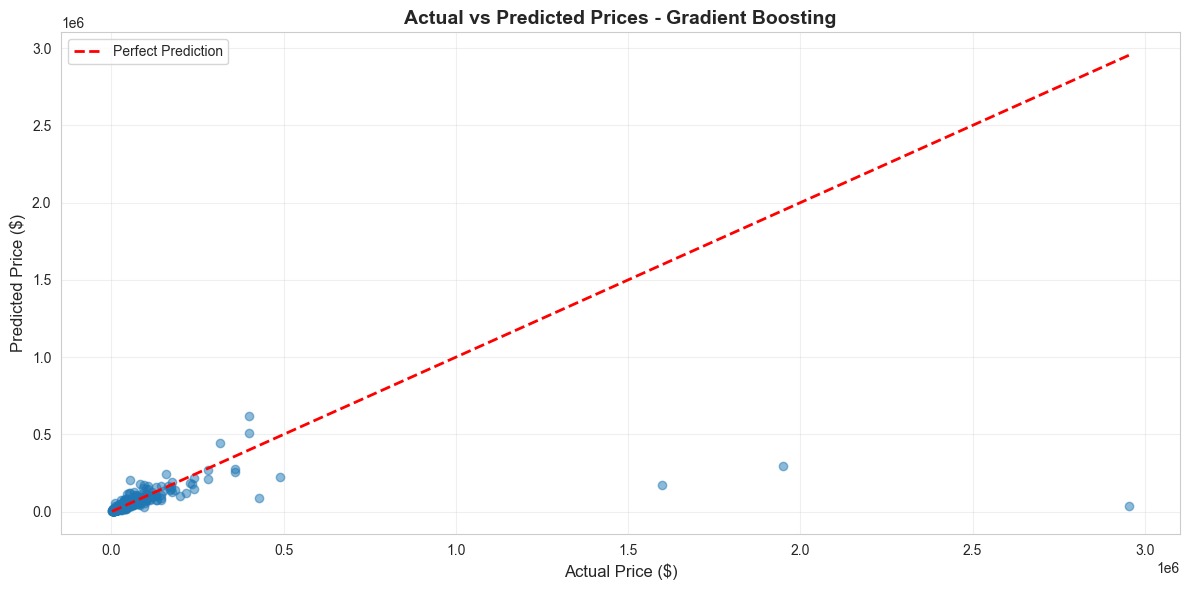

In [124]:
# Get best model
best_model = models[best_model_name]

# Make predictions with best model
y_pred_best = best_model.predict(X_test_scaled)

# Prediction vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title(f'Actual vs Predicted Prices - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

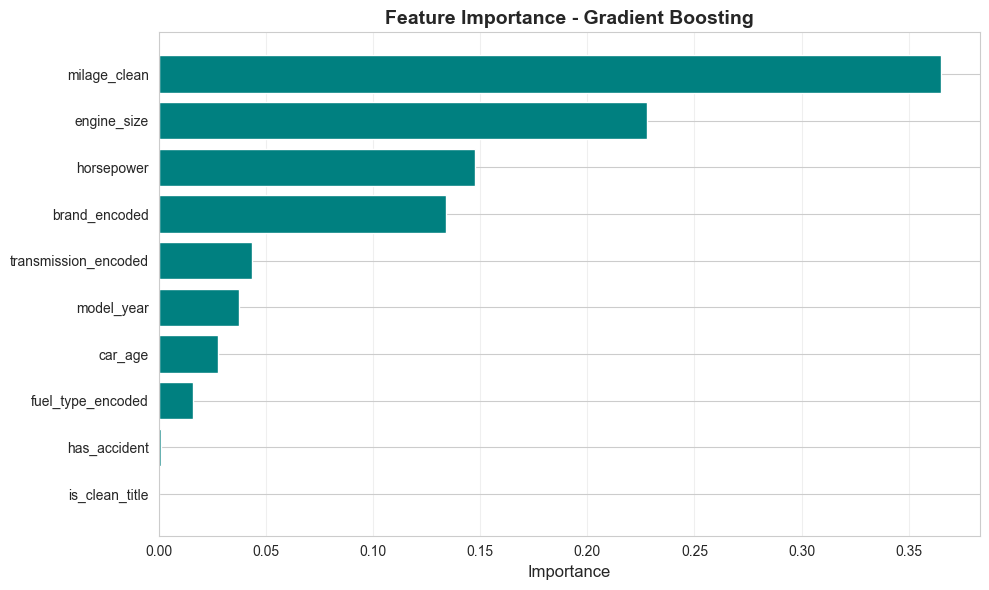


Top 5 Most Important Features:
             Feature  Importance
        milage_clean    0.364985
         engine_size    0.227874
          horsepower    0.147368
       brand_encoded    0.134240
transmission_encoded    0.043509


In [125]:
# Feature Importance (for tree-based models)
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']:
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
        plt.xlabel('Importance', fontsize=12)
        plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("\nTop 5 Most Important Features:")
        print(feature_importance.head().to_string(index=False))

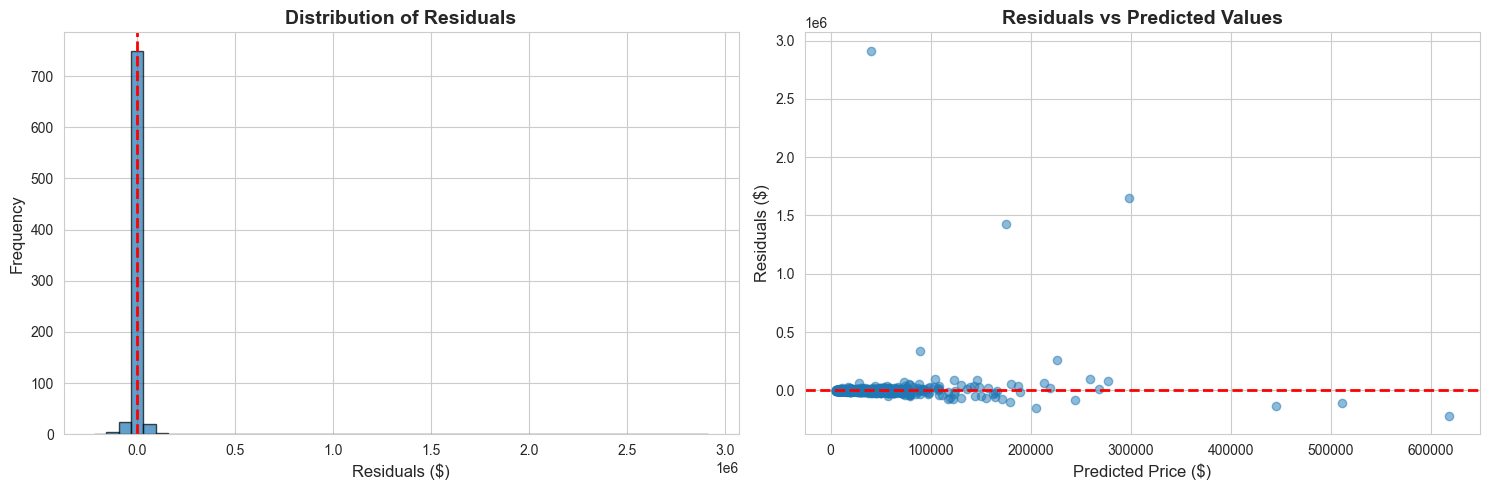

In [126]:
# Residual Analysis
residuals = y_test - y_pred_best

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Residuals distribution
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Residuals ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2)

# Residuals vs Predicted
axes[1].scatter(y_pred_best, residuals, alpha=0.5)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Price ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [127]:
# Sample predictions
sample_predictions = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred_best[:10],
    'Difference': y_test.values[:10] - y_pred_best[:10],
    'Error %': np.abs((y_test.values[:10] - y_pred_best[:10]) / y_test.values[:10] * 100)
})

print("\n📋 SAMPLE PREDICTIONS (First 10 Test Cases)")
print("="*80)
print(sample_predictions.to_string(index=False))
print("="*80)


📋 SAMPLE PREDICTIONS (First 10 Test Cases)
 Actual Price  Predicted Price    Difference    Error %
      28000.0     31366.931389  -3366.931389  12.024755
       5900.0      9186.151278  -3286.151278  55.697479
      41000.0     46301.083171  -5301.083171  12.929471
      40250.0     49231.538694  -8981.538694  22.314382
      77999.0     65546.861059  12452.138941  15.964485
      35899.0     34989.148311    909.851689   2.534476
      36000.0     36612.545474   -612.545474   1.701515
      47214.0    116981.019818 -69767.019818 147.767653
      30900.0     14367.129308  16532.870692  53.504436
      11000.0      9580.083201   1419.916799  12.908335


In [128]:
print("="*80)
print("🎯 CAR PRICE PREDICTION PROJECT - FINAL SUMMARY")
print("="*80)
print(f"\n📊 Dataset Information:")
print(f"   - Total Records: {len(df_clean):,}")
print(f"   - Training Set: {len(X_train):,} ({len(X_train)/len(df_encoded)*100:.1f}%)")
print(f"   - Test Set: {len(X_test):,} ({len(X_test)/len(df_encoded)*100:.1f}%)")

print(f"\n🔧 Features Used: {X.shape[1]}")
print(f"   {', '.join(X.columns)}")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   - R² Score: {results_df.iloc[0]['R2 Score']:.4f}")
print(f"   - MAE: ${results_df.iloc[0]['MAE']:,.2f}")
print(f"   - RMSE: ${results_df.iloc[0]['RMSE']:,.2f}")

print(f"\n💡 Key Insights:")
print(f"   - The {best_model_name} model explains {results_df.iloc[0]['R2 Score']*100:.2f}% of price variance")
print(f"   - Average prediction error: ${results_df.iloc[0]['MAE']:,.2f}")
print(f"   - Price range in dataset: ${df_clean['price_clean'].min():,.0f} - ${df_clean['price_clean'].max():,.0f}")
print(f"   - Mean price: ${df_clean['price_clean'].mean():,.2f}")

print("\n" + "="*80)
print("✅ Project completed successfully!")
print("="*80)

🎯 CAR PRICE PREDICTION PROJECT - FINAL SUMMARY

📊 Dataset Information:
   - Total Records: 4,009
   - Training Set: 3,207 (80.0%)
   - Test Set: 802 (20.0%)

🔧 Features Used: 10
   brand_encoded, model_year, milage_clean, fuel_type_encoded, transmission_encoded, car_age, has_accident, is_clean_title, horsepower, engine_size

🏆 Best Model: Gradient Boosting
   - R² Score: 0.1616
   - MAE: $18,002.04
   - RMSE: $130,903.56

💡 Key Insights:
   - The Gradient Boosting model explains 16.16% of price variance
   - Average prediction error: $18,002.04
   - Price range in dataset: $2,000 - $2,954,083
   - Mean price: $44,553.19

✅ Project completed successfully!
